### Append Path

In [1]:
import sys

sys.path.append("..")

%load_ext autoreload
%autoreload 2

### Load Data

In [2]:
import pandas as pd

df = pd.read_csv("../data/processed/merged_data.csv")

print(f"Original Shape: {df.shape}")

df.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14076\1876596912.py:3: DtypeWarning: Columns (12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/processed/merged_data.csv")


Original Shape: (2731946, 18)


,CampusKey,SiteKey,Timestamp,SolarGeneration,ApparentTemperature,AirTemperature,DewPointTemperature,RelativeHumidity,WindSpeed,WindDirection,kWp,Number of panels,Panel,Inverter,Optimizers,Metric,lat,Lon
0,2,1,2020-01-01 00:15:00,NaN,18.560000,20.300000,9.600000,50.266667,8.680000,152.666667,NaN,NaN,NaN,NaN,NaN,NaN,-36.111209,146.848679
1,2,1,2020-01-01 00:30:00,NaN,18.146667,19.840000,9.340000,50.666667,7.933333,157.533333,NaN,NaN,NaN,NaN,NaN,NaN,-36.111209,146.848679
2,2,1,2020-01-01 00:45:00,NaN,18.140000,19.886667,9.486667,51.000000,8.440000,147.600000,NaN,NaN,NaN,NaN,NaN,NaN,-36.111209,146.848679
3,2,1,2020-01-01 01:00:00,NaN,17.693333,19.540000,9.180000,51.133333,8.680000,151.333333,NaN,NaN,NaN,NaN,NaN,NaN,-36.111209,146.848679
4,2,1,2020-01-01 01:15:00,NaN,17.613333,19.153333,9.053333,51.933333,6.866667,149.333333,NaN,NaN,NaN,NaN,NaN,NaN,-36.111209,146.848679


### Clean Data

In [ ]:
from src.preprocessing import clean_data, filter_valid_sites

df_clean = clean_data(df)
df_clean = filter_valid_sites(df_clean)

print(f"Cleaned Shape: {df_clean.shape}\n")

print(df_clean.isnull().sum())

Dropped 1536301 rows with missing Target.


d:\Assignments\Semester-5\Machine-Learning\ALP\notebooks\..\src\preprocessing.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[existing_weather_cols] = df[existing_weather_cols].interpolate(
d:\Assignments\Semester-5\Machine-Learning\ALP\notebooks\..\src\preprocessing.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SolarGeneration"] = df["SolarGeneration"].clip(lower=0)



Dropping 485641 rows with missing 'kWp' capacity data.
Cleaned Shape: (710004, 18)
CampusKey                  0
SiteKey                    0
Timestamp                  0
SolarGeneration            0
ApparentTemperature        0
AirTemperature             0
DewPointTemperature        0
RelativeHumidity           0
WindSpeed                  0
WindDirection              0
kWp                        0
Number of panels           0
Panel                      0
Inverter                   0
Optimizers             54697
Metric                     0
lat                        0
Lon                        0
dtype: int64


### Feature Engineering

In [5]:
from src.preprocessing import feature_engineering

df_fe = feature_engineering(df_clean)

print(f"Feature Engineered Shape: {df_fe.shape}")

df_fe.head()

Feature Engineered Shape: (710004, 27)


,CampusKey,SiteKey,Timestamp,SolarGeneration,ApparentTemperature,AirTemperature,DewPointTemperature,RelativeHumidity,WindSpeed,WindDirection,...,Lon,Hour,Month,DayOfYear,Year,IsDaylight,hour_sin,hour_cos,month_sin,month_cos
853120,1,14,2020-06-14 08:00:00,0.137360,6.700000,9.240000,9.140000,99.000000,12.04,333.666667,...,145.050975,8,6,166,2020,True,0.866025,-0.500000,1.224647e-16,-1.0
853121,1,14,2020-06-14 08:15:00,0.432175,6.593333,9.493333,9.073333,97.266667,13.96,327.600000,...,145.050975,8,6,166,2020,True,0.866025,-0.500000,1.224647e-16,-1.0
853122,1,14,2020-06-14 08:30:00,0.738617,6.900000,9.860000,8.433333,90.866667,13.48,328.933333,...,145.050975,8,6,166,2020,True,0.866025,-0.500000,1.224647e-16,-1.0
853123,1,14,2020-06-14 08:45:00,0.993897,7.353333,10.306667,8.033333,85.866667,12.76,337.266667,...,145.050975,8,6,166,2020,True,0.866025,-0.500000,1.224647e-16,-1.0
853124,1,14,2020-06-14 09:00:00,1.353455,7.760000,10.580000,7.786667,82.866667,12.04,343.800000,...,145.050975,9,6,166,2020,True,0.707107,-0.707107,1.224647e-16,-1.0


### Visualize Data

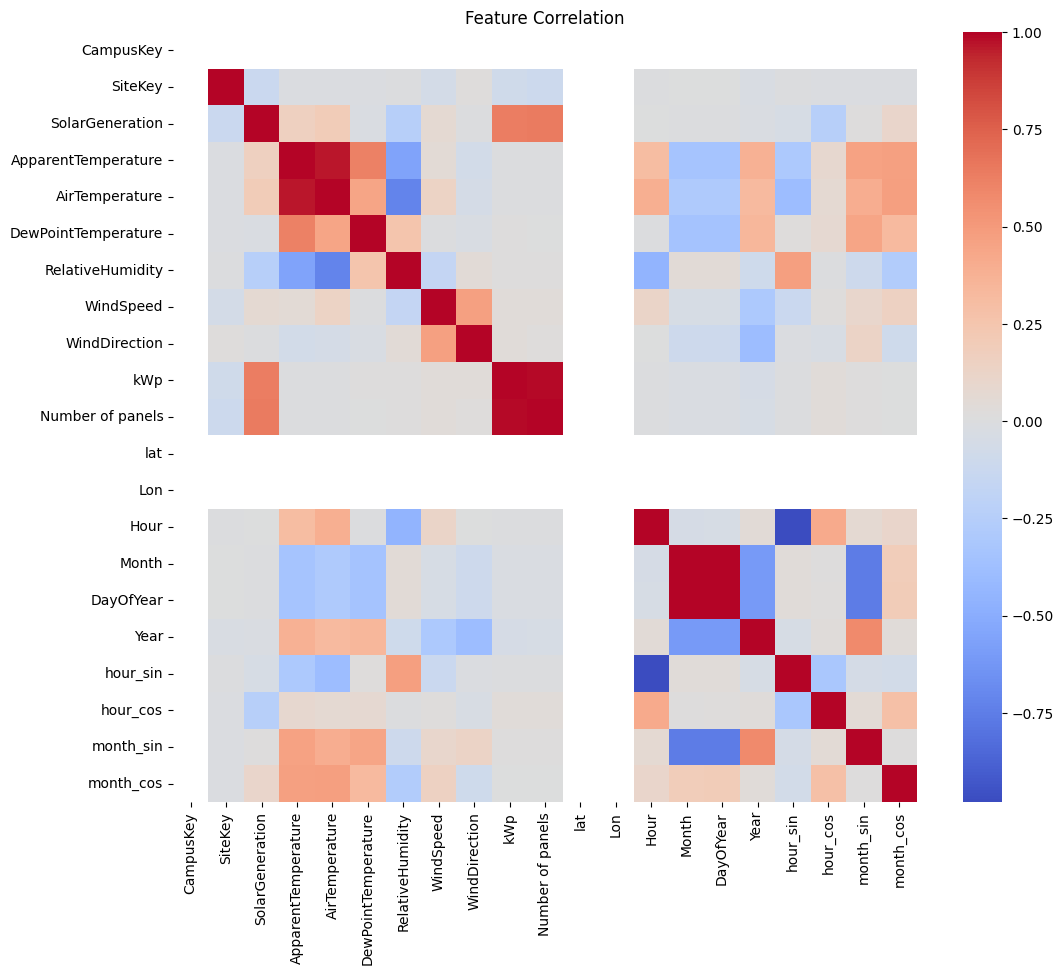

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
numeric_cols = df_fe.select_dtypes(include=["float64", "int64", "int32"]).columns

sns.heatmap(df_fe[numeric_cols].corr(), cmap="coolwarm", annot=False)

plt.title("Feature Correlation")

plt.show()

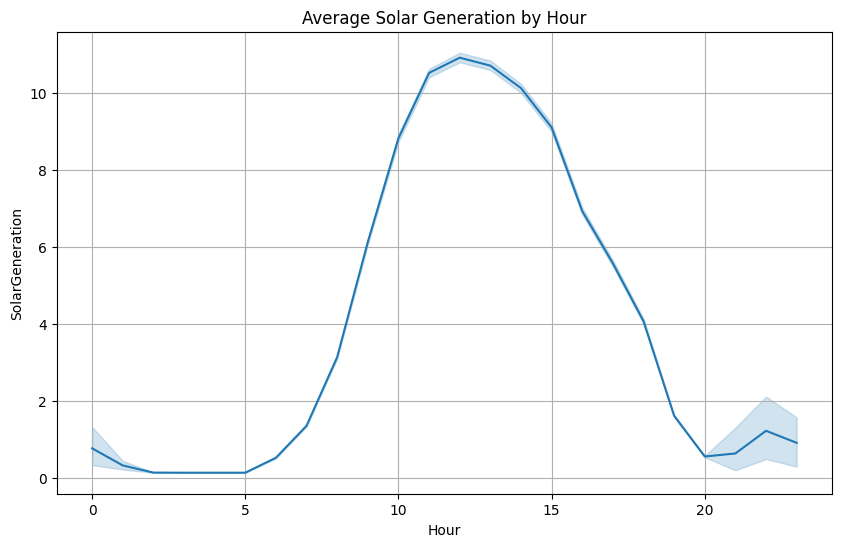

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_fe, x="Hour", y="SolarGeneration")
plt.title("Average Solar Generation by Hour")
plt.grid(True)
plt.show()

### Save Data

In [8]:
df_fe.to_csv("../data/processed/feature_engineered_data.csv", index=False)
print("Feature engineered data saved.")

Feature engineered data saved.
